# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc_1 = sinasc_raw[['munResLat','munResNome','QTDFILMORT','IDANOMAL']]
sinasc_1.head(3)

,munResLat,munResNome,QTDFILMORT,IDANOMAL
0,-11.93554,Alta Floresta D'Oeste,0.0,2.0
1,-11.93554,Alta Floresta D'Oeste,0.0,2.0
2,-11.93554,Alta Floresta D'Oeste,0.0,2.0


In [5]:
#faixa_de_lat = {
#    sinasc_1[sinasc_1['munResLat'] > -10.5]: 'Acima de -10.5',
#    sinasc_1[sinasc_1['munResLat'] < -10.5]: 'Abaixo de -10.5'
#}
def funcao_faixa(faixa):
    if faixa < -10.5:
        return 'abaixo'
    else :
        return 'acima'

sinasc_1.loc[:, 'Faixa'] = sinasc_1['munResLat'].apply(lambda x: funcao_faixa(x))
sinasc_1.head(3)

C:\Users\vitor\AppData\Local\Temp\ipykernel_8984\173785312.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1.loc[:, 'Faixa'] = sinasc_1['munResLat'].apply(lambda x: funcao_faixa(x))


,munResLat,munResNome,QTDFILMORT,IDANOMAL,Faixa
0,-11.93554,Alta Floresta D'Oeste,0.0,2.0,abaixo
1,-11.93554,Alta Floresta D'Oeste,0.0,2.0,abaixo
2,-11.93554,Alta Floresta D'Oeste,0.0,2.0,abaixo


In [6]:
#IDANOMAL indica Anomalia 1=Sim, 2=Não. 
sinasc_1.groupby('Faixa')[['IDANOMAL']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

IDANOMAL                                               
            sum      mean  min  max median       std       var
Faixa                                                         
abaixo  26119.0  2.014578  1.0  9.0    2.0  0.392014  0.153675
acima   27549.0  2.044908  1.0  9.0    2.0  0.624151  0.389565

In [7]:
#QTDFILMORT INDICA Número de filhos mortos. 
sinasc_1.groupby('Faixa')[['QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

QTDFILMORT                                                
              sum      mean  min   max median       std       var
Faixa                                                            
abaixo     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317
acima      3539.0  0.291828  0.0   9.0    0.0  0.627863  0.394212

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_2 = sinasc_raw[['munResArea','munResNome','LOCNASC','APGAR5']]
sinasc_2.head(3)

,munResArea,munResNome,LOCNASC,APGAR5
0,7067.025,Alta Floresta D'Oeste,1,10.0
1,7067.025,Alta Floresta D'Oeste,1,9.0
2,7067.025,Alta Floresta D'Oeste,1,10.0


In [9]:
def funcao_faixa2(faixa):
    if faixa < 3000:
        return 'abaixo'
    else :
        return 'acima'

sinasc_2.loc[:, 'Faixa2'] = sinasc_2['munResArea'].apply(lambda x: funcao_faixa2(x))
sinasc_2.head(4)

C:\Users\vitor\AppData\Local\Temp\ipykernel_8984\3719428633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_2.loc[:, 'Faixa2'] = sinasc_2['munResArea'].apply(lambda x: funcao_faixa2(x))


,munResArea,munResNome,LOCNASC,APGAR5,Faixa2
0,7067.025,Alta Floresta D'Oeste,1,10.0,acima
1,7067.025,Alta Floresta D'Oeste,1,9.0,acima
2,7067.025,Alta Floresta D'Oeste,1,10.0,acima
3,3958.273,Alto Alegre dos Parecis,1,10.0,acima


In [10]:
sinasc_2.groupby('Faixa2')[['LOCNASC']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

LOCNASC                                             
           sum      mean min max median       std       var
Faixa2                                                     
abaixo    5258  1.007473   1   4    1.0  0.125899  0.015851
acima    22078  1.012334   1   4    1.0  0.169112  0.028599

In [11]:
sinasc_2.groupby('Faixa2')[['APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

APGAR5                                                
             sum      mean  min   max median       std       var
Faixa2                                                          
abaixo   47560.0  9.130351  0.0  10.0    9.0  0.801124  0.641799
acima   199589.0  9.190873  0.0  10.0    9.0  0.787592  0.620301

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
sinasc_raw.munResAlt.median()

153.0

In [13]:
sinasc_raw.munResAlt.mean()

179.11199911199913

In [14]:
sinasc_3 = sinasc_raw[['munResAlt','munResNome','IDADEPAI','APGAR1']]

In [15]:
def funcao_faixa3(faixa):
    if faixa < 179:
        return 'abaixo'
    else :
        return 'acima'

sinasc_3.loc[:, 'Faixa3'] = sinasc_3['munResAlt'].apply(lambda x: funcao_faixa3(x))
sinasc_3.head(4)

C:\Users\vitor\AppData\Local\Temp\ipykernel_8984\2016533021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_3.loc[:, 'Faixa3'] = sinasc_3['munResAlt'].apply(lambda x: funcao_faixa3(x))


,munResAlt,munResNome,IDADEPAI,APGAR1,Faixa3
0,338.0,Alta Floresta D'Oeste,26.0,9.0,acima
1,338.0,Alta Floresta D'Oeste,24.0,8.0,acima
2,338.0,Alta Floresta D'Oeste,32.0,8.0,acima
3,397.0,Alto Alegre dos Parecis,24.0,9.0,acima


In [16]:
sinasc_3.groupby('Faixa3')[['APGAR1']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

APGAR1                                                
             sum      mean  min   max median       std       var
Faixa3                                                          
abaixo  155554.0  8.154862  0.0  10.0    8.0  0.996443  0.992898
acima    63604.0  8.095202  0.0  10.0    8.0  0.955128  0.912269

In [17]:
sinasc_3.groupby('Faixa3')[['IDADEPAI']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

IDADEPAI                                                   
             sum       mean   min   max median       std        var
Faixa3                                                             
abaixo  118148.0  31.330682  15.0  73.0   30.0  7.876949  62.046324
acima   118372.0  30.858186  16.0  86.0   30.0  7.659556  58.668801

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [18]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

In [19]:
sinasc_m = sinasc_raw[['munResNome','DTNASC','IDADEMAE']]
#sinasc_m = sinasc_raw[['munResNome','IDADEMAE']]
sinasc_m.head(5)

,munResNome,DTNASC,IDADEMAE
0,Alta Floresta D'Oeste,2019-02-19,19
1,Alta Floresta D'Oeste,2019-02-21,29
2,Alta Floresta D'Oeste,2019-02-25,37
3,Alto Alegre dos Parecis,2019-03-20,30
4,Alta Floresta D'Oeste,2019-03-23,30


In [20]:
sinasc_m['DTNASC'].dtypes

dtype('O')

In [21]:
sinasc_m.loc[:, 'DTNASC'] = pd.to_datetime(sinasc_m['DTNASC'])

In [22]:
sinasc_m = sinasc_m.set_index('munResNome')

In [23]:
pv = sinasc_m.loc['Porto Velho']

In [24]:
pv_media = pv.groupby('DTNASC')['IDADEMAE'].mean()
result_d = sinasc_m.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack()

In [25]:
result_d

munResNome,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
DTNASC,,,,,,
2019-01-01,23.200000,23.250000,31.000000,24.142857,21.388889,27.750000
2019-01-02,26.166667,27.666667,30.800000,25.545455,26.050000,28.727273
2019-01-03,24.142857,27.846154,26.000000,27.000000,26.638889,23.375000
2019-01-04,24.666667,25.230769,22.500000,23.125000,28.814815,26.000000
2019-01-05,22.888889,23.200000,23.250000,27.100000,27.250000,28.200000
...,...,...,...,...,...,...
2019-12-27,24.666667,24.000000,25.333333,27.466667,28.410256,27.000000
2019-12-28,23.833333,22.888889,23.333333,26.375000,26.291667,22.666667
2019-12-29,23.166667,24.100000,24.666667,24.125000,25.470588,24.250000


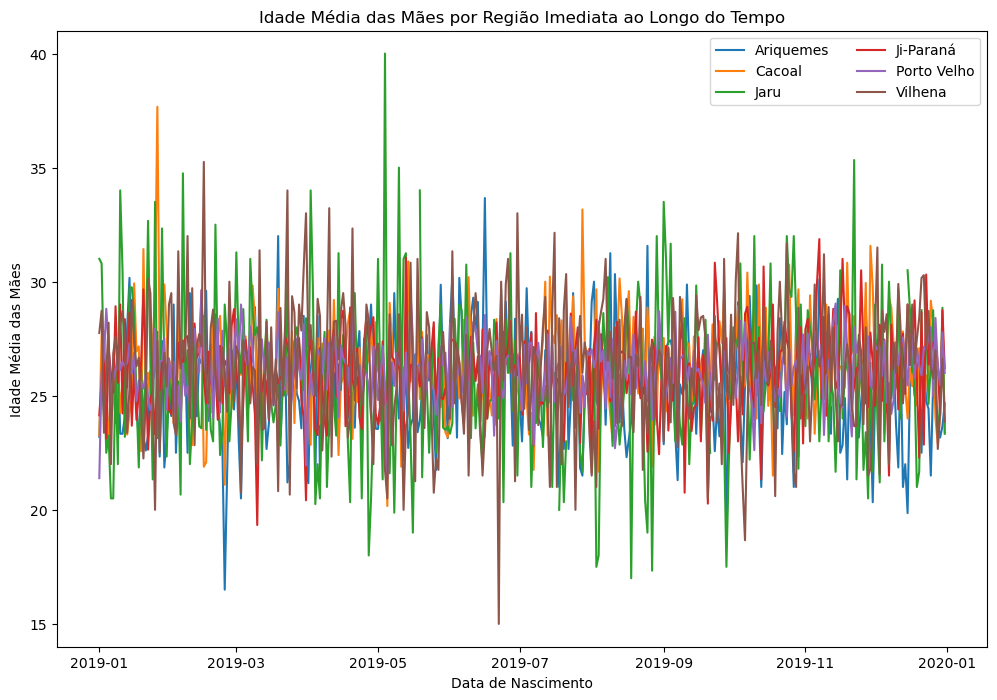

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando os dados
for column in result_d.columns:
    ax.plot(result_d.index, result_d[column], label=column)

# Configurando a legenda
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(1, 1), ncol=2)

# Configurando os limites do eixo y
ax.set_ylim(14,41)

# Configurando o título e os rótulos dos eixos
ax.set_title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
ax.set_xlabel('Data de Nascimento')
ax.set_ylabel('Idade Média das Mães')

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [28]:
#utilizei  o excel para editar e organizar a tabela
idh = pd.read_excel('IDH sinasc.xlsx')
idh.head(5)

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação
0,1,Porto Velho,0.736,0.764,0.819,0.638
1,2,Vilhena,0.731,0.734,0.808,0.659
2,3,Cacoal,0.718,0.727,0.821,0.620
3,4,Ji-Paraná,0.714,0.728,0.810,0.617
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613


In [29]:
#considerando o IDH
def categorizar_idh(valor):
    if valor < 0.6:
        return 'idh_baixo'
    elif valor >= 0.7:
        return 'idh_alto'
    else:
        return 'idh_medio'

In [47]:
idh['categoria'] = idh['IDH municipal'].apply(categorizar_idh)
idh.head(7)

,Posição,Município,IDH municipal,IDH renda,IDH longevidade,IDH educação,categoria
0,1,Porto Velho,0.736,0.764,0.819,0.638,idh_alto
1,2,Vilhena,0.731,0.734,0.808,0.659,idh_alto
2,3,Cacoal,0.718,0.727,0.821,0.620,idh_alto
3,4,Ji-Paraná,0.714,0.728,0.810,0.617,idh_alto
4,5,Pimenta Bueno,0.710,0.726,0.803,0.613,idh_alto
5,6,Ariquemes,0.702,0.716,0.806,0.600,idh_alto
6,7,Rolim de Moura,0.700,0.709,0.808,0.598,idh_alto


In [31]:
#criando o dicionario para se usar o mapping
IDH_dic = dict(zip(idh['Município'], idh['categoria']))
IDH_dic

{'Porto Velho': 'idh_alto',
 'Vilhena': 'idh_alto',
 'Cacoal': 'idh_alto',
 'Ji-Paraná': 'idh_alto',
 'Pimenta Bueno': 'idh_alto',
 'Ariquemes': 'idh_alto',
 'Rolim de Moura': 'idh_alto',
 'Cerejeiras': 'idh_medio',
 'Jaru': 'idh_medio',
 'Colorado do Oeste': 'idh_medio',
 'Ouro Preto do Oeste': 'idh_medio',
 "Espigão d'Oeste": 'idh_medio',
 "Santa Luzia d'Oeste": 'idh_medio',
 'Pimenteiras do Oeste': 'idh_medio',
 'Presidente Médici': 'idh_medio',
 'Castanheiras': 'idh_medio',
 'Guajará-Mirim': 'idh_medio',
 'Chupinguaia': 'idh_medio',
 'Cabixi': 'idh_medio',
 'Candeias do Jamari': 'idh_medio',
 "São Felipe d'Oeste": 'idh_medio',
 'Cacaulândia': 'idh_medio',
 'São Miguel do Guaporé': 'idh_medio',
 'Mirante da Serra': 'idh_medio',
 "Alvorada d'Oeste": 'idh_medio',
 'Teixeirópolis': 'idh_medio',
 "Nova Brasilândia d'Oeste": 'idh_medio',
 'Rio Crespo': 'idh_medio',
 'Primavera de Rondônia': 'idh_medio',
 "Alta Floresta d'Oeste": 'idh_medio',
 'Ministro Andreazza': 'idh_medio',
 'Novo Hor

In [66]:
idh_agrupado = idh.set_index('Município')
idh_agrupado.head(7)

,Posição,IDH municipal,IDH renda,IDH longevidade,IDH educação,categoria
Município,,,,,,
Porto Velho,1,0.736,0.764,0.819,0.638,idh_alto
Vilhena,2,0.731,0.734,0.808,0.659,idh_alto
Cacoal,3,0.718,0.727,0.821,0.620,idh_alto
Ji-Paraná,4,0.714,0.728,0.810,0.617,idh_alto
Pimenta Bueno,5,0.710,0.726,0.803,0.613,idh_alto
Ariquemes,6,0.702,0.716,0.806,0.600,idh_alto
Rolim de Moura,7,0.700,0.709,0.808,0.598,idh_alto


In [33]:
idh_agrupado.columns

Index(['Posição', 'IDH municipal', 'IDH renda', 'IDH longevidade',
       'IDH educação', 'categoria'],
      dtype='object')

In [34]:
idh_agrupado.groupby(IDH_dic)[['IDH municipal', 'IDH renda', 'IDH longevidade', 'IDH educação']].mean()

,IDH municipal,IDH renda,IDH longevidade,IDH educação
Município,,,,
idh_alto,0.715857,0.729143,0.810714,0.620714
idh_baixo,0.591333,0.627222,0.764444,0.431667
idh_medio,0.643250,0.652111,0.790667,0.517333


In [40]:
sinasc_idh = sinasc_raw[['munResNome','IDADEPAI','APGAR5','IDADEMAE']]

In [41]:
sinasc_idh = sinasc_idh.set_index('munResNome')

In [46]:
sinasc_idh.groupby(IDH_dic, dropna=False).agg([ 'mean', 'min', 'max', 'median', 'std', 'var'])


IDADEPAI                                            APGAR5       \
                 mean   min   max median       std        var      mean  min   
munResNome                                                                     
idh_alto    31.074091  15.0  70.0   30.0  7.773149  60.421845  9.171668  0.0   
idh_baixo   30.402332  16.0  58.0   30.0  7.141936  51.007246  9.267925  1.0   
idh_medio   31.570029  16.0  73.0   31.0  7.864526  61.850774  9.225567  0.0   
NaN         30.593536  16.0  86.0   30.0  7.765201  60.298350  9.018135  0.0   

                                              IDADEMAE                 \
             max median       std       var       mean min max median   
munResNome                                                              
idh_alto    10.0    9.0  0.758370  0.575125  26.280332  12  47   26.0   
idh_baixo   10.0    9.0  0.807764  0.652482  25.269231  13  46   25.0   
idh_medio   10.0    9.0  0.803008  0.644821  25.848191  11  53   25.0   
NaN         10.0    9.0  0.965009  0.931242  25.910170  13  53   25.0   

                                 
                 std        var  
munResNome                       
idh_alto    6.415374  41.157021  
idh_baixo   6.103193  37.248970  
idh_medio   6.372794  40.612499  
NaN         6.306086  39.766720

In [ ]:
idh.Município.nunique()

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [65]:
ifdm = pd.read_excel('IFDM.xlsx')
ifdm.head(5)

,Município,IFDM
0,Ariquemes,0.7746
1,Vilhena,0.7465
2,Pimenta Bueno,0.7383
3,Porto Velho,0.7257
4,Ji-Paraná,0.7117


In [67]:
def categorizar_ifdm(valor):
    if valor > 0.6:
        return 'moderado'
    else:
        return 'regular'

In [69]:
ifdm['categoria'] = ifdm['IFDM'].apply(categorizar_ifdm)
ifdm.head(7)

,Município,IFDM,categoria
0,Ariquemes,0.7746,moderado
1,Vilhena,0.7465,moderado
2,Pimenta Bueno,0.7383,moderado
3,Porto Velho,0.7257,moderado
4,Ji-Paraná,0.7117,moderado
5,Cacoal,0.7111,moderado
6,Santa Luzia d'Oeste,0.6850,moderado


In [71]:
ifdm_dict = dict(zip(ifdm['Município'], ifdm['categoria']))
ifdm_dict

{'Ariquemes': 'moderado',
 'Vilhena': 'moderado',
 'Pimenta Bueno': 'moderado',
 'Porto Velho': 'moderado',
 'Ji-Paraná': 'moderado',
 'Cacoal': 'moderado',
 "Santa Luzia d'Oeste": 'moderado',
 'Rolim de Moura': 'moderado',
 'Chupinguaia': 'moderado',
 'São Miguel do Guaporé': 'moderado',
 'Pimenteiras do Oeste': 'moderado',
 'Teixeirópolis': 'moderado',
 'Colorado do Oeste': 'moderado',
 'Jaru': 'moderado',
 'Rio Crespo': 'moderado',
 'Primavera de Rondônia': 'moderado',
 "Alta Floresta d'Oeste": 'moderado',
 'Ouro Preto do Oeste': 'moderado',
 'São Francisco do Guaporé': 'moderado',
 'Candeias do Jamari': 'moderado',
 'Buritis': 'moderado',
 "São Felipe d'Oeste": 'moderado',
 'Presidente Médici': 'moderado',
 'Cerejeiras': 'moderado',
 'Monte Negro': 'moderado',
 'Urupá': 'moderado',
 "Espigão d'Oeste": 'regular',
 'Seringueiras': 'regular',
 "Alvorada d'Oeste": 'regular',
 'Itapuã do Oeste': 'regular',
 'Cabixi': 'regular',
 'Novo Horizonte do Oeste': 'regular',
 "Nova Brasilândia d

In [73]:
sinasc_ifdm = sinasc_raw[['QTDFILVIVO','QTDFILMORT','PESO','munResNome']]

In [75]:
sinasc_ifdm = sinasc_ifdm.set_index('munResNome')

In [77]:
sinasc_ifdm.groupby(ifdm_dict, dropna= False).agg([ 'mean', 'min', 'max', 'median', 'std', 'var'])


QTDFILVIVO                                       QTDFILMORT       \
                 mean  min   max median       std       var       mean  min   
munResNome                                                                    
moderado     1.030350  0.0  12.0    1.0  1.121112  1.256892   0.272476  0.0   
regular      1.172404  0.0  14.0    1.0  1.339352  1.793864   0.264967  0.0   
NaN          1.080586  0.0  30.0    1.0  1.322696  1.749523   0.207806  0.0   

                                                    PESO                     \
             max median       std       var         mean  min   max  median   
munResNome                                                                    
moderado    28.0    0.0  0.622147  0.387067  3243.947354  258  5720  3275.0   
regular      7.0    0.0  0.606532  0.367881  3255.036835  425  5070  3275.0   
NaN          9.0    0.0  0.533878  0.285026  3212.406298  370  5985  3250.0   

                                       
                   std            var  
munResNome                             
moderado    547.977515  300279.356948  
regular     519.001837  269362.906667  
NaN         555.615112  308708.152502

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [115]:
pib = pd.read_excel('PIB.xlsx')

In [116]:
pib['PIB'] = pib['PIB'].str.replace(' ','').astype(float)
pib['Município'] = pib['Município'].astype(str).str.lstrip()

In [117]:
def categorizar_pib(valor):
    if valor < 100000:
        return 'abaixo de 100 milhões'
    elif valor < 200000 and valor > 100000 :
        return 'acima de 100 milhões'
    elif valor < 300000 and valor > 200000:
        return 'acima de 200 milhões'
    elif valor < 500000 and valor > 300000:
        return 'acima de 300 milhões'
    elif valor < 1000000 and valor > 500000:
        return 'acima de 500 milhões'
    else:
        return 'acima de 1 bilhão'

In [118]:
pib['categoria'] = pib['PIB'].apply(categorizar_pib)
pib.head(9)

,Município,PIB,categoria
0,Porto Velho,17912070.0,acima de 1 bilhão
1,Ji-Paraná,3783972.0,acima de 1 bilhão
2,Vilhena,2831175.0,acima de 1 bilhão
3,Ariquemes,2579830.0,acima de 1 bilhão
4,Cacoal,2261644.0,acima de 1 bilhão
5,Jaru,1500890.0,acima de 1 bilhão
6,Rolim de Moura,1283434.0,acima de 1 bilhão
7,Pimenta Bueno,1164877.0,acima de 1 bilhão
8,Guajará-Mirim,893000.0,acima de 500 milhões


In [119]:
pib_dict = dict(zip(pib['Município'],pib['categoria']))
pib_dict

{'Porto Velho': 'acima de 1 bilhão',
 'Ji-Paraná': 'acima de 1 bilhão',
 'Vilhena': 'acima de 1 bilhão',
 'Ariquemes': 'acima de 1 bilhão',
 'Cacoal': 'acima de 1 bilhão',
 'Jaru': 'acima de 1 bilhão',
 'Rolim de Moura': 'acima de 1 bilhão',
 'Pimenta Bueno': 'acima de 1 bilhão',
 'Guajará-Mirim': 'acima de 500 milhões',
 'Ouro Preto do Oeste': 'acima de 500 milhões',
 'Buritis': 'acima de 500 milhões',
 'Machadinho do Oeste': 'acima de 500 milhões',
 "Espigão d'Oeste": 'acima de 500 milhões',
 'São Miguel do Guaporé': 'acima de 500 milhões',
 'Candeias do Jamari': 'acima de 500 milhões',
 'Nova Mamoré': 'acima de 500 milhões',
 'Cerejeiras': 'acima de 500 milhões',
 'Alta Floresta do Oeste': 'acima de 300 milhões',
 'Presidente Médici': 'acima de 300 milhões',
 'Cujubim': 'acima de 300 milhões',
 'Nova Brasilândia do Oeste': 'acima de 300 milhões',
 'Alto Paraíso': 'acima de 300 milhões',
 'São Francisco do Guaporé': 'acima de 300 milhões',
 'Colorado do Oeste': 'acima de 300 milhões'

In [120]:
sinasc_pib = sinasc_raw[['QTDFILVIVO','IDADEMAE','PESO','munResNome']]

In [121]:
sinasc_pib = sinasc_pib.set_index('munResNome')

In [144]:
agrupamento = sinasc_pib.groupby(pib_dict, dropna=True)[['QTDFILVIVO','IDADEMAE','PESO']].agg(['min','max','mean','median'])
agrupamento

QTDFILVIVO                        IDADEMAE      \
                             min   max      mean median      min max   
munResNome                                                             
abaixo de 100 milhões        0.0   6.0  1.032258    1.0       14  41   
acima de 1 bilhão            0.0  12.0  1.026435    1.0       12  47   
acima de 100 milhões         0.0  14.0  0.992320    1.0       12  52   
acima de 200 milhões         0.0   7.0  1.010526    1.0       13  41   
acima de 300 milhões         0.0   8.0  1.062097    1.0       11  47   
acima de 500 milhões         0.0  11.0  1.228385    1.0       13  53   

                                        PESO                             
                            mean median  min   max         mean  median  
munResNome                                                               
abaixo de 100 milhões  26.519894   26.0  320  4505  3197.679045  3210.0  
acima de 1 bilhão      26.265562   26.0  292  5720  3247.215719  3275.0  
acima de 100 milhões   25.638424   25.0  425  4810  3250.392337  3265.0  
acima de 200 milhões   25.146435   25.0  930  4680  3233.701349  3260.0  
acima de 300 milhões   25.706070   25.0  258  4888  3240.387380  3290.0  
acima de 500 milhões   25.785927   25.0  285  5135  3243.336315  3270.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Quanto maior o PIB, maior tende a ser o peso médio dos bebês ao nascer,assim como, a idade média das mães geralmente é menor que a dos pais.